In [1]:
import sys
import os
module_path = os.path.abspath(os.path.join('..'))
sys.path.append(module_path)
module_path

'c:\\Projects\\aaai\\GRETEL'

In [2]:
os.chdir(module_path)

In [3]:
from src.evaluation.evaluator_manager import EvaluatorManager
from src.evaluation.evaluator_manager_do import EvaluatorManager as PairedEvaluatorManager

from src.utils.context import Context
import sys

In [4]:
config_f_name = '2-TCR-128-32-0.2_GCN_OBS.jsonc'

In [5]:
config_path = os.path.join(module_path, 'lab', 'config', config_f_name)
runno = 1
    
print(f"Generating context for: {config_path}")
context = Context.get_context(config_path)
context.run_number = runno

context.logger.info(f"Executing: {context.config_file} Run: {context.run_number}")
context.logger.info("Creating the evaluation manager....................................")


if 'do-pairs' in context.conf:
    context.logger.info(f"Creating the paired  evaluators.....................................")
    eval_manager = PairedEvaluatorManager(context)
else:
    context.logger.info("Creating the evaluators......................................................")
    eval_manager = EvaluatorManager(context)

context.logger.info(
    "Evaluating the explainers............................................................."
)
eval_manager.evaluate()


Generating context for: c:\Projects\aaai\GRETEL\lab\config\2-TCR-128-32-0.2_GCN_OBS.jsonc
,-934589164 | INFO | 20364 - Executing: c:\Projects\aaai\GRETEL\lab\config\2-TCR-128-32-0.2_GCN_OBS.jsonc Run: 1
,-934589132 | INFO | 20364 - Creating the evaluation manager....................................
,-934589109 | INFO | 20364 - Creating the paired  evaluators.....................................
,-934589021 | INFO | 20364 - Loading: TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37
,-934588951 | INFO | 20364 - Created: TreeCyclesRand-19c1e767fe0a580f23abfb7486c24b37
,-934588938 | INFO | 20364 - Instantiating: src.oracle.nn.gcn.DownstreamGCN
,-934588874 | INFO | 20364 - Instantiating: torch.optim.RMSprop
,-934588873 | INFO | 20364 - Instantiating: torch.nn.CrossEntropyLoss
,-934588808 | INFO | 20364 - Loading: OracleTorch-f16f95a68a8f23c404f4684325d241af
,-934588749 | INFO | 20364 - Created: OracleTorch-f16f95a68a8f23c404f4684325d241af
,-934588741 | INFO | 20364 - Instantiating: src.explai

In [6]:
evaluator = eval_manager.evaluators[0]
evaluator

In [7]:
inst_cf_pairs = evaluator.get_instance_explanation_pairs()
og_inst = inst_cf_pairs[2][0]
cf_inst = inst_cf_pairs[2][1]

In [8]:
from src.data_analysis.data_analyzer import DataAnalyzer as dan
changes = dan.get_cf_changes(og_inst, cf_inst, False)

In [9]:
common_edges = changes['common edges']
added_edges = changes['added edges']
removed_edges = changes['removed edges']
common_nodes = changes['common nodes']
added_nodes = changes['added nodes']
removed_nodes = changes['removed nodes']

print(f'added edges: {added_edges}')
print(f'removed_edges: {removed_edges}')
print(f'added nodes: {added_nodes}')
print(f'removed nodes: {removed_nodes}')

added edges: []
removed_edges: [(3, 22), (23, 28)]
added nodes: []
removed nodes: []


In [10]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
layout = nx.spring_layout
pos = layout(og_inst.get_nx())

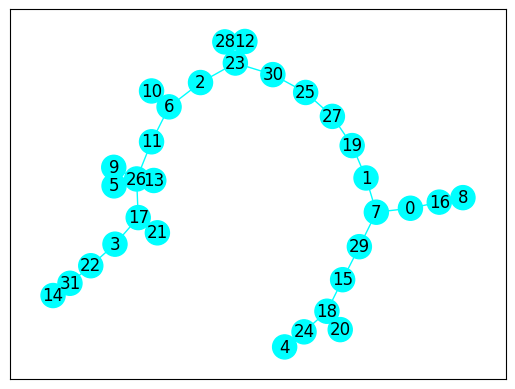

In [12]:
pos = dan.draw_graph(og_inst)

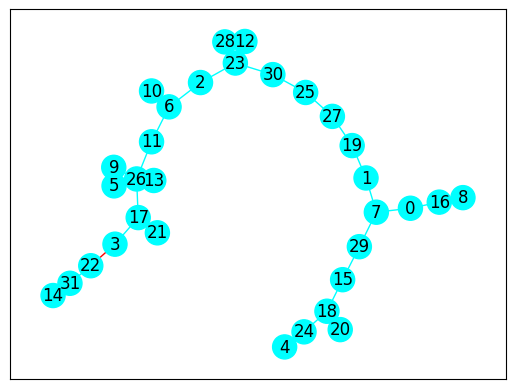

In [13]:
dan.draw_counterfactual_actions(og_inst, cf_inst, position=pos)

In [17]:
import pandas as pd
results_path = os.path.join(module_path, 'lab', 'output', 'results')
stats_file_path = os.path.join(module_path, 'lab', 'stats', 'results.csv')
res = dan.create_aggregated_dataframe_oldstyle(results_path)
res.to_csv(stats_file_path)


,-934321116 | INFO | 20364 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
,-934321114 | INFO | 20364 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
,-934321112 | INFO | 20364 - Instantiating: src.evaluation.evaluation_metric_oracle_calls.OracleCallsMetric
,-934321109 | INFO | 20364 - Instantiating: src.evaluation.evaluation_metric_correctness.CorrectnessMetric
,-934321106 | INFO | 20364 - Instantiating: src.evaluation.evaluation_metric_sparsity.SparsityMetric
,-934321102 | INFO | 20364 - Instantiating: src.evaluation.evaluation_metric_fidelity.FidelityMetric
,-934321099 | INFO | 20364 - Instantiating: src.evaluation.evaluation_metric_oracle_accuracy.OracleAccuracyMetric
,-934321092 | INFO | 20364 - Instantiating: src.evaluation.evaluation_metric_runtime.RuntimeMetric
,-934321090 | INFO | 20364 - Instantiating: src.evaluation.evaluation_metric_ged.GraphEditDistanceMetric
,-934321088 | INFO | 20364 - Instantiating: src.evaluation.ev

C:\Users\mapra\AppData\Local\Temp\ipykernel_20364\1170570973.py:5: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  res.to_excel(stats_file_path)


ModuleNotFoundError: No module named 'xlwt'